# Data visualization path

# Background
Healthcare-Associated Infections (HAIs) are a significant concern worldwide, leading to
increased patient morbidity, extended hospital stays and
additional healthcare costs. By analyzing this dataset, we aim to
contribute to public health awareness and promote more effective infection control
strategies.  
# Primary Objective
We analyze hospital infection control data to identify patterns, trends, and potential risk factors associated with healthcare-associated infections. By evaluating hospital performance using Standardized Infection Ratio (SIR) scores, our goal was to highlight the top hospitals managing specific infections locally and nationalwide.

In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
# Read the data into a Pandas DataFrame
Hospital_infect_data = pd.read_csv('Resources/Healthcare_Associated_Infections_Hospital.csv')
Hospital_infect_data.head(10)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,1/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,1/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485,NaN,1/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,1/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2,NaN,1/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
5,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Central line-associated bloodstream infections...,HAI_1_SIR,No Different than National Benchmark,0.983,NaN,1/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
6,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Lower Confidence Limit,HAI_1a_CI_LOWER,Worse than the National Benchmark,1.168,NaN,7/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
7,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Upper Confidence Limit,HAI_1a_CI_UPPER,Worse than the National Benchmark,7.068,NaN,7/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
8,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Central Line Days,HAI_1a_DOPC_DAYS,Worse than the National Benchmark,1045,NaN,7/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
9,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI Predicted Cases,HAI_1a_ELIGCASES,Worse than the National Benchmark,1.568,NaN,7/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"


In [3]:
# Get a brief summary of the dataframe.
Hospital_infect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222864 entries, 0 to 222863
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           222864 non-null  int64 
 1   Hospital Name         222864 non-null  object
 2   Address               222864 non-null  object
 3   City                  222864 non-null  object
 4   State                 222864 non-null  object
 5   ZIP Code              222864 non-null  int64 
 6   County Name           222240 non-null  object
 7   Phone Number          222864 non-null  int64 
 8   Measure Name          222864 non-null  object
 9   Measure ID            222864 non-null  object
 10  Compared to National  222864 non-null  object
 11  Score                 222864 non-null  object
 12  Footnote              141684 non-null  object
 13  Measure Start Date    222864 non-null  object
 14  Measure End Date      222864 non-null  object
 15  Location         

In [4]:
# Convert 'Score' column to numeric, coercing errors to NaN
Hospital_infect_data['Score'] = pd.to_numeric(Hospital_infect_data['Score'], errors='coerce')

# Check if 'Score' column conversion was successful
print(Hospital_infect_data['Score'].dtype)  # Should print 'float64' or 'int64'

float64


In [5]:
# Check for missing values
missing_values = Hospital_infect_data.isnull().sum()
missing_values

Provider ID                  0
Hospital Name                0
Address                      0
City                         0
State                        0
ZIP Code                     0
County Name                624
Phone Number                 0
Measure Name                 0
Measure ID                   0
Compared to National         0
Score                   124717
Footnote                 81180
Measure Start Date           0
Measure End Date             0
Location                     0
dtype: int64

In [6]:
# Check for duplicates in Uber data
duplicates = Hospital_infect_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print or use num_duplicates as needed
print("Number of duplicate rows in Hospital_infect_data:", num_duplicates)

Number of duplicate rows in Hospital_infect_data: 0


In [7]:
# Get unique categories in 'Compared to National'
unique_Compared_National = Hospital_infect_data['Compared to National'].unique()

# Display the unique Compared to National
print("Unique Compared to National:")
print(unique_Compared_National)

Unique Compared to National:
['No Different than National Benchmark'
 'Worse than the National Benchmark' 'Better than the National Benchmark'
 'Not Available']


In [8]:
# Count the number of 'Not Available' entries
not_available_count = Hospital_infect_data[Hospital_infect_data['Compared to National'] == 'Not Available'].shape[0]
print(f"\nNumber of 'Not Available' entries: {not_available_count}")


Number of 'Not Available' entries: 121398


In [9]:
print(Hospital_infect_data['Measure Name'].unique())

# Count the number of unique measure names
num_unique_measure_names = Hospital_infect_data['Measure Name'].nunique()

print(f"Number of unique measure names: {num_unique_measure_names}")

['CLABSI: Lower Confidence Limit' 'CLABSI: Upper Confidence Limit'
 'CLABSI: Number of Procedures' 'CLABSI: Predicted Cases'
 'CLABSI: Observed Cases'
 'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards'
 'CLABSI Lower Confidence Limit' 'CLABSI Upper Confidence Limit'
 'CLABSI Central Line Days' 'CLABSI Predicted Cases'
 'CLABSI Observed Cases'
 'Central line-associated blood stream infections (CLABSI) in ICUs only'
 'CAUTI: Lower Confidence Limit' 'CAUTI: Upper Confidence Limit'
 'CAUTI: Number of Procedures' 'CAUTI: Predicted Cases'
 'CAUTI: Observed Cases'
 'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards'
 'CAUTI Lower Confidence Limit' 'CAUTI Upper Confidence Limit'
 'CAUTI Urinary Catheter Days' 'CAUTI Predicted Cases'
 'CAUTI Observed Cases'
 'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only'
 'SSI: Colon Lower Confidence Limit' 'SSI: Colon Upper Confidence Limit'
 'C.diff Patient Days' 'SSI: Colon, Nu

In [10]:
# Convert 'Measure End Date' to datetime
Hospital_infect_data['Measure End Date'] = pd.to_datetime(Hospital_infect_data['Measure End Date'], errors='coerce')

# Extract year from 'Measure End Date'
Hospital_infect_data['Year'] = Hospital_infect_data['Measure End Date'].dt.year

# Count the number of records per year
records_per_year = Hospital_infect_data['Year'].value_counts().sort_index()

print("Number of records per year:")
print(records_per_year)

Number of records per year:
Year
2015    222864
Name: count, dtype: int64


# ETA: Hospital Performance Compared to National Benchmarks

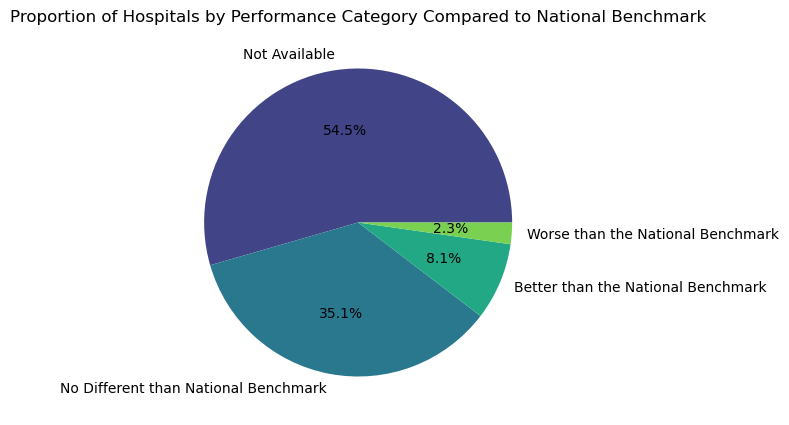

In [11]:
# Count the number of hospitals in each performance category
performance_counts = Hospital_infect_data['Compared to National'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(performance_counts)))
plt.title('Proportion of Hospitals by Performance Category Compared to National Benchmark')
plt.show()

### Data cleaning needed since large portion of Not available data

# ETA-Measure-Specific Analysis

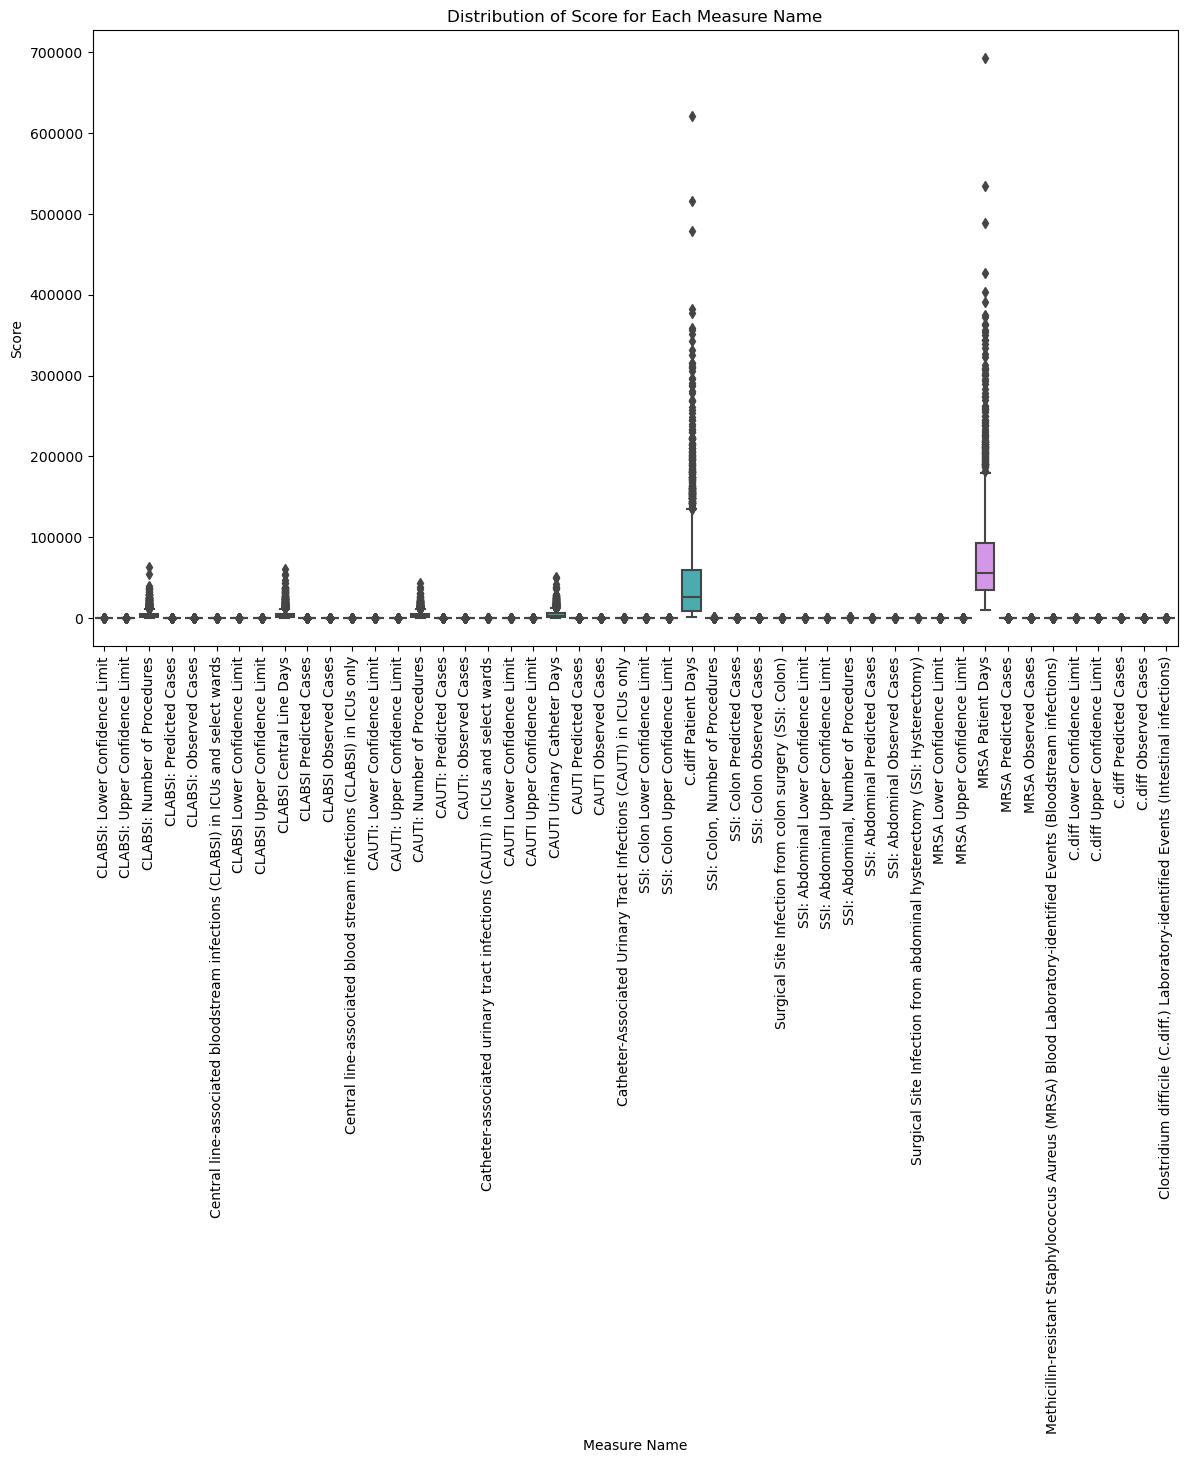

In [12]:
# Group by the 'Measure Name' column and describe the 'Score' column
measure_name_distribution = Hospital_infect_data.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=Hospital_infect_data)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()


Data has outliers.

# ETA- Regional Trend

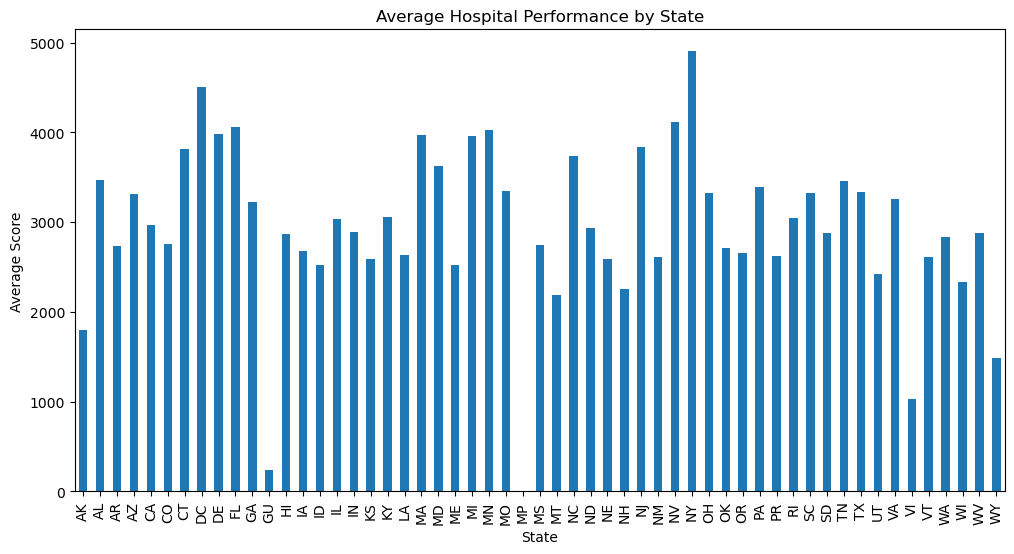

In [13]:
#Are hospitals in certain states performing better or worse than others? . High score poor management of infections.

state_performance = Hospital_infect_data.groupby('State')['Score'].mean()


plt.figure(figsize=(12, 6))
state_performance.plot(kind='bar')
plt.title('Average Hospital Performance by State')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

Not availale data needed to be handled

# Data cleaning & data wrangling 

# Remove missing values

In [14]:
# Remove rows where 'Score' is missing
hospital_data_cleaned = Hospital_infect_data.dropna(subset=['Score'])

# Check the shape of the cleaned data
print(f"Data shape after removing missing scores: {hospital_data_cleaned.shape}")

# Optional: Check if there are any remaining missing values in 'Score'
print(f"Remaining missing values in 'Score': {hospital_data_cleaned['Score'].isna().sum()}")


Data shape after removing missing scores: (98147, 17)
Remaining missing values in 'Score': 0


In [15]:
# Remove rows where 'Compared to National' is 'Not Available'
hospital_data_filtered = hospital_data_cleaned[hospital_data_cleaned['Compared to National'] != 'Not Available']

# Check the shape of the filtered data
print(f"Data shape after removing 'Not Available' entries: {hospital_data_filtered.shape}")

# Optional: Check if there are any remaining 'Not Available' values
print(f"Remaining 'Not Available' entries: {hospital_data_filtered[hospital_data_filtered['Compared to National'] == 'Not Available'].shape[0]}")

Data shape after removing 'Not Available' entries: (98147, 17)
Remaining 'Not Available' entries: 0


In [16]:
hospital_data_filtered['Measure Name'] = hospital_data_filtered['Measure Name'].replace({
    'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards': 
    'CLABSI: CLABSI_ICUs&select wards',
    
    'CLABSI Lower Confidence Limit': 
    'CLABSI: Lower Confidence Limit',
    
    'CLABSI Upper Confidence Limit': 
    'CLABSI: Upper Confidence Limit',
    
    'CLABSI Central Line Days': 
    'CLABSI: Central Line Days',
    
    'CLABSI Predicted Cases': 
    'CLABSI: Predicted Cases',
    
    'CLABSI Observed Cases': 
    'CLABSI: Observed Cases',
    
    'Central line-associated blood stream infections (CLABSI) in ICUs only': 
    'CLABSI: CLABSI_ICUs only',
    
    'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards': 
    'CAUTI: CAUTI_ICUs&select wards',
    
    'CAUTI Lower Confidence Limit': 
    'CAUTI: CAUTI Lower Confidence Limit',
    
    'CAUTI Upper Confidence Limit': 
    'CAUTI: Upper Confidence Limit',
    
    'CAUTI Urinary Catheter Days': 
    'CAUTI: Urinary Catheter Days',
    
    'CAUTI Predicted Cases': 
    'CAUTI: Predicted Cases',
    
    'CAUTI Observed Cases': 
    'CAUTI: Observed Cases',
    
    'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only': 
    'CAUTI: CAUTI_ICUs only',
    
    'C.diff Patient Days': 
    'C.diff: C.diff Patient Days',
    
    'Surgical Site Infection from colon surgery (SSI: Colon)': 
    'SSI: Surgical Site_colon surgery',
    
    'Surgical Site Infection from abdominal hysterectomy (SSI: Hysterectomy)': 
    'SSI: SSI_Hysterectomy',
    
    'MRSA Lower Confidence Limit': 
    'MRSA: MRSA Lower Confidence Limit',
    
    'MRSA Upper Confidence Limit': 
    'MRSA: MRSA Upper Confidence Limit',
    
    'MRSA Patient Days': 
    'MRSA: Patient Days',
    
    'MRSA Predicted Cases': 
    'MRSA: Predicted Cases',
    
    'MRSA Observed Cases': 
    'MRSA: Observed Cases',
    
    'Methicillin-resistant Staphylococcus Aureus (MRSA) Blood Laboratory-identified Events (Bloodstream infections)': 
    'MRSA: MRSA_Blood_Laboratory-identified Events',
    
    'C.diff Lower Confidence Limit': 
    'C.diff: C.diff Lower Confidence Limit',
    
    'C.diff Upper Confidence Limit': 
    'C.diff: C.diff Upper Confidence Limit',
    
    'C.diff Predicted Cases': 
    'C.diff: C.diff Predicted Cases', 
    
    'C.diff Observed Cases': 
    'C.diff: C.diff Observed Cases',
    
    'Clostridium difficile (C.diff.) Laboratory-identified Events (Intestinal infections)': 
    'C.diff: C.diff_Laboratory-identified Events'
})



In [17]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location,Year
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,1/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,1/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485.000,NaN,1/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,1/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2.000,NaN,1/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015


In [18]:
# split the Measure name col. 

# Split the 'Measure Name' column into 'Abbreviation' and 'Description'
hospital_data_filtered[['Infection', 'Measure']] = hospital_data_filtered['Measure Name'].str.split(': ', n=1, expand=True)



In [19]:
hospital_data_filtered['Compared to National'] = hospital_data_filtered['Compared to National'].replace({
    'No Different than National Benchmark': 'same',
    'Worse than the National Benchmark': 'worse',
    'Better than the National Benchmark': 'better'
})



In [20]:
# List of columns to drop
columns_to_drop = ['Footnote', 'Location', 'Category',]

# Drop the columns if they exist in the DataFrame
hospital_data_filtered = hospital_data_filtered.drop(columns=[col for col in columns_to_drop if col in hospital_data_filtered.columns])


In [21]:
# Ensure the 'Measure Start Date' and 'Measure End Date' columns are in datetime format
hospital_data_filtered['Measure Start Date'] = pd.to_datetime(hospital_data_filtered['Measure Start Date'])
hospital_data_filtered['Measure End Date'] = pd.to_datetime(hospital_data_filtered['Measure End Date'])

# Calculate the number of days between 'Measure Start Date' and 'Measure End Date'
hospital_data_filtered['Number of Measure Days'] = (hospital_data_filtered['Measure End Date'] - hospital_data_filtered['Measure Start Date']).dt.days

In [22]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Measure Start Date,Measure End Date,Year,Infection,Measure,Number of Measure Days
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,same,0.165,2015-01-01,2015-06-30,2015,CLABSI,Lower Confidence Limit,180
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,same,3.249,2015-01-01,2015-06-30,2015,CLABSI,Upper Confidence Limit,180
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,same,1485.000,2015-01-01,2015-06-30,2015,CLABSI,Number of Procedures,180
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,same,2.034,2015-01-01,2015-06-30,2015,CLABSI,Predicted Cases,180
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,same,2.000,2015-01-01,2015-06-30,2015,CLABSI,Observed Cases,180


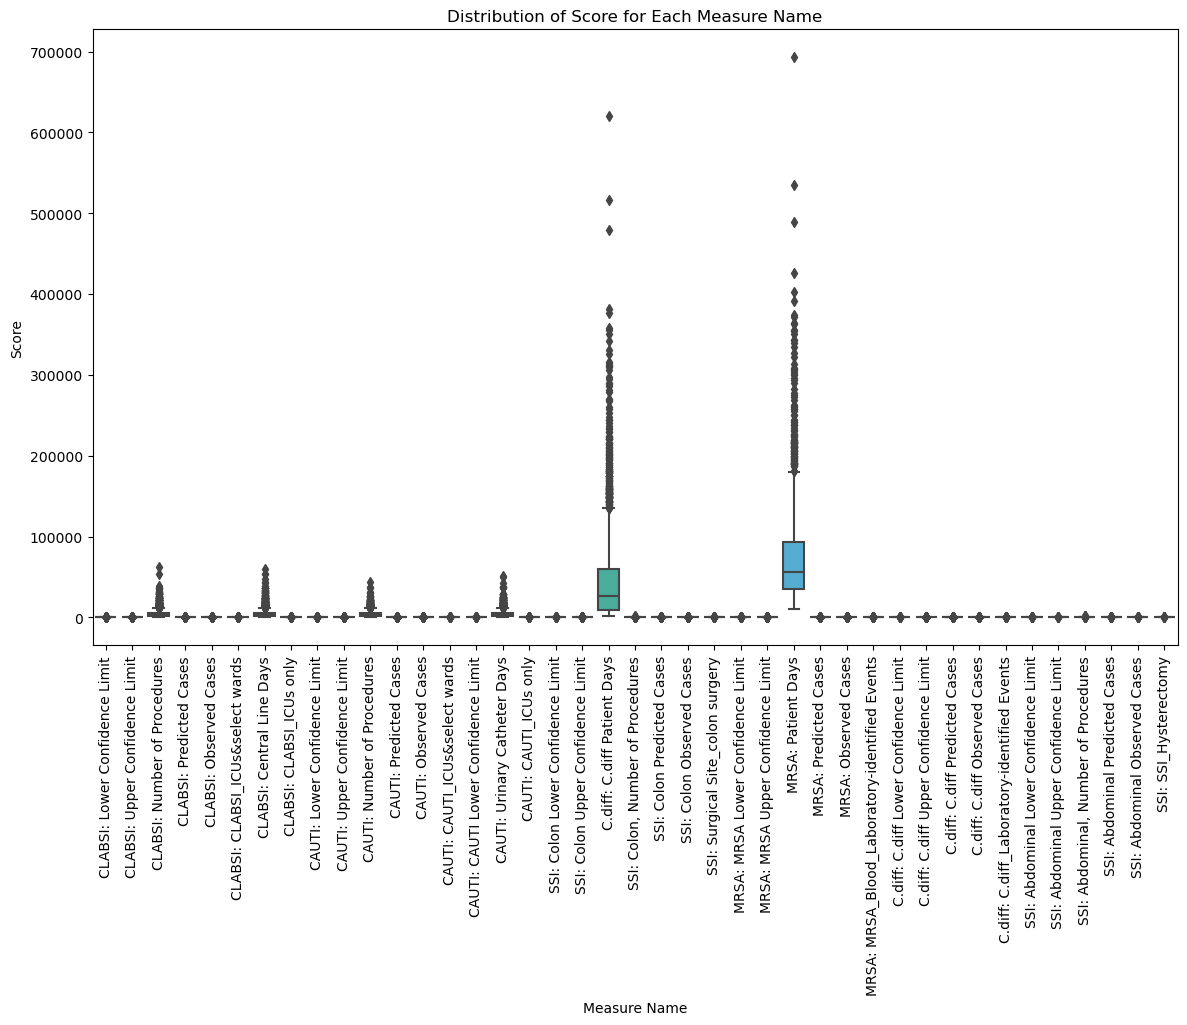

In [23]:
# Group by the 'Measure Name' column and describe the 'Score' column
measure_name_distribution = hospital_data_filtered.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=hospital_data_filtered)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()


In [24]:
# Remove outliers
# Function to remove outliers based on the IQR
def remove_outliers(hospital_data_filtered, column):
    Q1 = hospital_data_filtered[column].quantile(0.25)
    Q3 = hospital_data_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return hospital_data_filtered[(hospital_data_filtered[column] >= lower_bound) & (hospital_data_filtered[column] <= upper_bound)]
# Apply the function to each group and combine the results back into a single DataFrame
cleaned_data = hospital_data_filtered.groupby(['Measure', 'Infection']).apply(lambda x: remove_outliers(x, 'Score')).reset_index(drop=True)

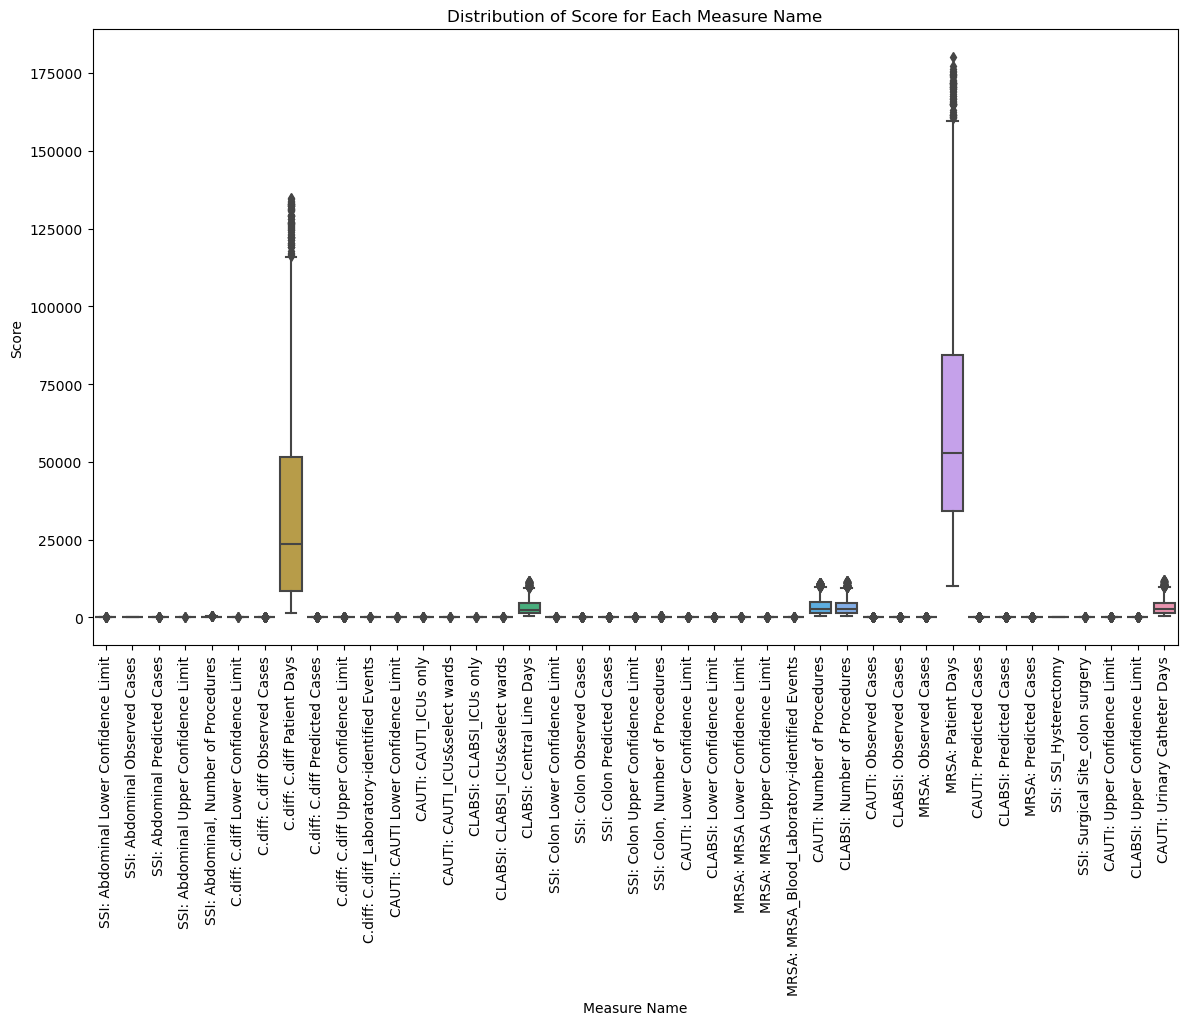

In [25]:
# Group by the 'Measure Name' column and describe the 'Score' column after removing outliers for each Measure Name
measure_name_distribution = cleaned_data.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=cleaned_data)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()

In [26]:
# Select the first 100 rows from the DataFrame
sample_data = cleaned_data.head(100)

# Save the sampled DataFrame to a CSV file
filename = 'Resources/hospital_cleaned_data_sampled.csv'
sample_data.to_csv(filename, index=False)

# Extract the data from above DataFrame to store in two tables for a database
1. Hospital Table
2. Measure table

In [27]:
# Extract Hospitals table
hospitals_df = cleaned_data[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number']].drop_duplicates()

### Find the csv file in the Database Folder

In [28]:
hospitals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 0 to 44659
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provider ID    3288 non-null   int64 
 1   Hospital Name  3288 non-null   object
 2   Address        3288 non-null   object
 3   City           3288 non-null   object
 4   State          3288 non-null   object
 5   ZIP Code       3288 non-null   int64 
 6   County Name    3282 non-null   object
 7   Phone Number   3288 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 231.2+ KB


In [29]:
# Extract Measures table
measures_df = cleaned_data[['Measure ID', 'Measure Name', 'Infection', 'Measure Start Date', 'Measure End Date','Compared to National', 'Score','Provider ID']].drop_duplicates()

### Find the csv file in the Database Folder

In [30]:
measures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92534 entries, 0 to 92533
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Measure ID            92534 non-null  object        
 1   Measure Name          92534 non-null  object        
 2   Infection             92534 non-null  object        
 3   Measure Start Date    92534 non-null  datetime64[ns]
 4   Measure End Date      92534 non-null  datetime64[ns]
 5   Compared to National  92534 non-null  object        
 6   Score                 92534 non-null  float64       
 7   Provider ID           92534 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 5.6+ MB


# Perform ETA again and perform Data Analysis

# Hospital performance Compared to National Benchmarks:

In [31]:
# Categorize hospitals into 'Better', 'Worse', or 'Same' based on performance compared to national benchmarks
performance_categories = cleaned_data['Compared to National'].value_counts()
print(performance_categories)

# Group by performance category and count the number of hospitals in each category
performance_group = cleaned_data.groupby('Compared to National')['Measure ID'].count()
print(performance_group)

Compared to National
same      72999
better    15830
worse      3705
Name: count, dtype: int64
Compared to National
better    15830
same      72999
worse      3705
Name: Measure ID, dtype: int64


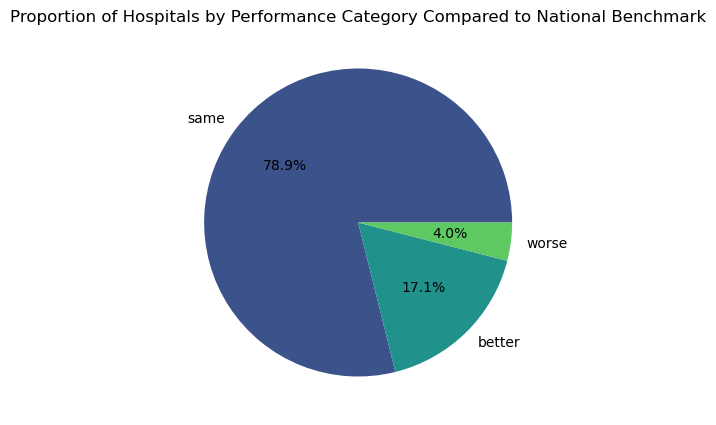

In [32]:
# Count the number of hospitals in each performance category
performance_counts = cleaned_data['Compared to National'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(performance_counts)))
plt.title('Proportion of Hospitals by Performance Category Compared to National Benchmark')
plt.show()

Results: Larger proprtion of hospital perform same as national benchmark

# How various measures are performing compared to national standards?

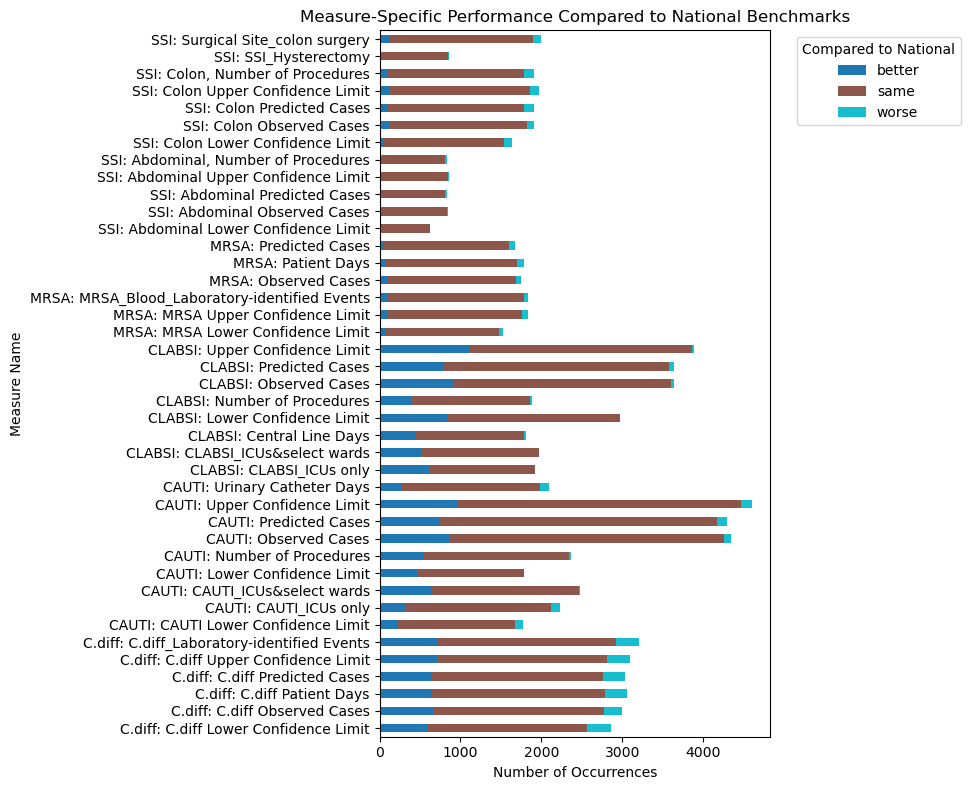

In [33]:
# Group by 'Measure Name' and 'Compared to National' and count occurrences
measure_performance = cleaned_data.groupby(['Measure Name', 'Compared to National']).size().unstack(fill_value=0)

# Plot the horizontal stacked bar chart
measure_performance.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='tab10')

# Add title and labels
plt.title('Measure-Specific Performance Compared to National Benchmarks')
plt.xlabel('Number of Occurrences')
plt.ylabel('Measure Name')

# Add legend
plt.legend(title='Compared to National', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

Null Hypothesis (H₀): Hospital performance (better, same, worse) is independent of the infection control measure. 
Alternative Hypothesis (H₁): Hospital performance (better, same, worse) is dependent on the infection control measure. 

In [34]:
from scipy.stats import chi2_contingency

# Group by 'Measure Name' and 'Compared to National' and count occurrences
measure_performance = cleaned_data.groupby(['Measure Name', 'Compared to National']).size().unstack(fill_value=0)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(measure_performance)

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 7296.940041482146
P-value: 0.0


Results: reject the null hypothesis. Type of measure significantly influences how hospitals perform compared to national benchmarks

# Regional Performance Compared to National Benchmarks

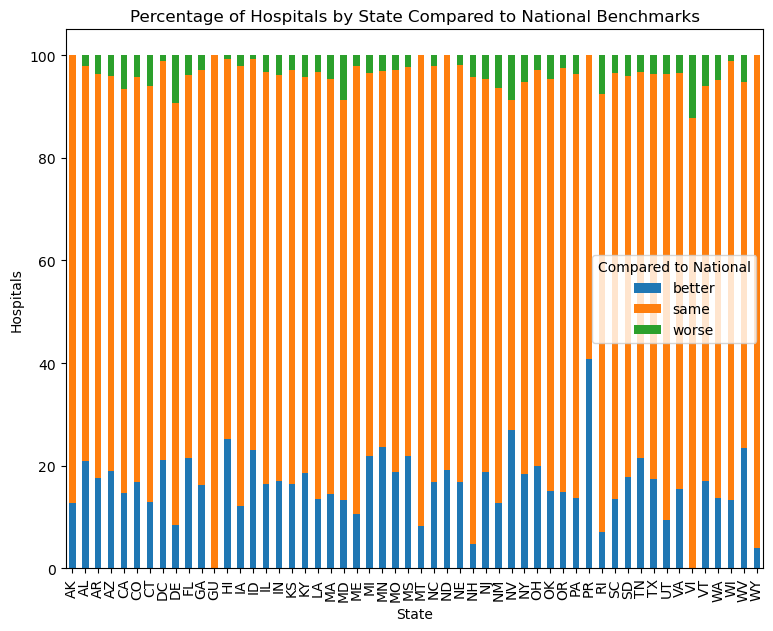

In [35]:
# Group by state and performance compared to national benchmarks
state_performance = cleaned_data.groupby(['State', 'Compared to National'])['Measure ID'].count().unstack().fillna(0)

# Calculate percentage distribution
state_performance_percentage = state_performance.div(state_performance.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
ax = state_performance_percentage.plot(kind='bar', stacked=True, figsize=(9, 7))

plt.title('Percentage of Hospitals by State Compared to National Benchmarks')
plt.xlabel('State')
plt.ylabel('Hospitals')
plt.legend(title='Compared to National')
plt.xticks(rotation=90)
plt.show()

Null Hypothesis (H₀): there is no significant association with hospital performance and the state the hospital lives in. Alternative Hypothesis (H₁): There is a significant association with the Hospital performance and the state the hospital lives in.

In [36]:
# perform chisqure
from scipy.stats import chi2_contingency

# Create a contingency table (State vs. Compared to National)
contingency_table = pd.crosstab(cleaned_data['State'], cleaned_data['Compared to National'])

# Apply the Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 1509.029378110796
P-value: 1.2063481521333772e-246


Results: Hospital performance (better, same, worse) is significantly associated with the state the hospital is in.

# Proportion of Different Major Infection Measures

Proportions of Different Major Infection Measures:
Major Category
CAUTI     28.110895
CLABSI    23.777599
C.diff    19.528870
SSI       17.293448
MRSA      11.289189
Name: count, dtype: float64


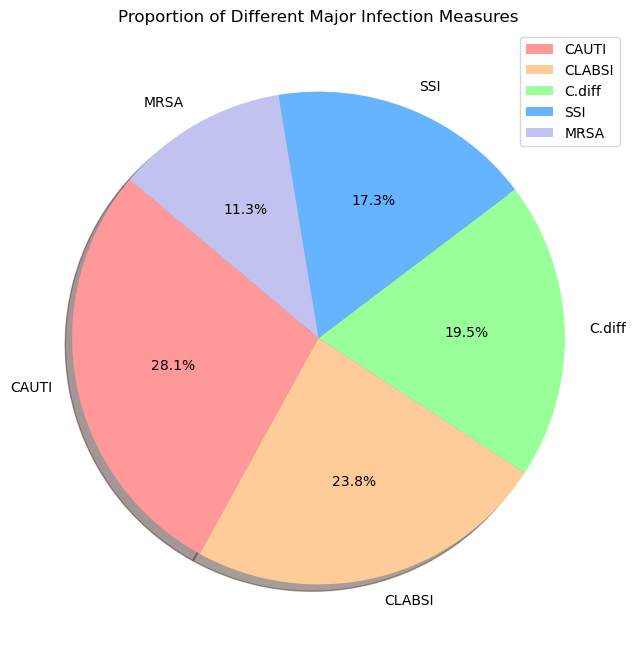

In [37]:
# Loop through each row and assign categories based on keywords
for index, row in hospital_data_filtered.iterrows():
    if 'CLABSI' in row['Measure Name']:
       hospital_data_filtered.at[index, 'Major Category'] = 'CLABSI'
    elif 'CAUTI' in row['Measure Name']:
        hospital_data_filtered.at[index, 'Major Category'] = 'CAUTI'
    elif 'SSI' in row['Measure Name']:
        hospital_data_filtered.at[index, 'Major Category'] = 'SSI'
    elif 'MRSA' in row['Measure Name']:
        hospital_data_filtered.at[index, 'Major Category'] = 'MRSA'
    elif 'C.diff' in row['Measure Name']:
       hospital_data_filtered.at[index, 'Major Category'] = 'C.diff'

# Calculate the value counts for each major category
category_counts = hospital_data_filtered['Major Category'].value_counts()

# Display the proportions
category_proportions = category_counts / category_counts.sum() * 100
print("Proportions of Different Major Infection Measures:")
print(category_proportions)

# Plotting the pie chart for the significant categories
plt.figure(figsize=(8, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True, colors=['#ff9999', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6'])
plt.title('Proportion of Different Major Infection Measures')
plt.legend()
plt.ylabel('')
plt.show()

Key Findings: Most prevalent measuring fields are Catheter-associated Urinary Tract Infections and Central-line associated Infections. We will focus on these two measures comparasion based on the regions.

# Top-performing healthcare providers Analysis
#### The national benchmark measurements for hospital infection control are largely based on data from the National Healthcare Safety Network (NHSN), managed by the Centers for Disease Control and Prevention (CDC). The primary metric used is the Standardized Infection Ratio (SIR), which compares the number of observed healthcare-associated infections (HAIs) in hospitals to the number predicted based on national data, adjusted for risk factors like patient population and hospital characteristics. 
##### The SIR uses a baseline as the national standard. A SIR of 1 means the number of observed infections is equal to the predicted number. Scores lower than 1 indicate better performance (fewer infections than predicted), while scores higher than 1 indicate worse performance (more infections than predicted).

## Slice Measure ID of SIR to compare

In [38]:
# Filter the data for Measure IDs that are relevant to SIR (HAI_1_SIR to HAI_6_SIR)
sir_measure_ids = ['HAI_1_SIR', 'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR']
sir_data = cleaned_data[cleaned_data['Measure ID'].isin(sir_measure_ids)]

# Slice the data to include Hospital ID, Hospital Name, Address, and Measure ID
sir_data_slice = sir_data[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Measure ID', 'Measure Name', 'Score']]

# Find the rows where 'Score' equals 0
zero_score_rows = sir_data_slice[sir_data_slice['Score'] == 0]

# Count how many rows have 'Score' equal to 0
zero_score_count = zero_score_rows.shape[0]

# Display the count of rows where 'Score' equals 0
print(f"Number of rows where 'Score' equals 0: {zero_score_count}")

# Remove rows where 'Score' equals 0
sir_data_slice = sir_data_slice[sir_data_slice['Score'] != 0]

# Display the cleaned data
sir_data_slice

Number of rows where 'Score' equals 0: 3319


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Measure ID,Measure Name,Score
19047,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.385
19048,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.495
19049,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.208
19050,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99508,ANCHORAGE,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.702
19051,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.511
...,...,...,...,...,...,...,...,...,...,...
81952,500002,PROVIDENCE ST MARY MEDICAL CENTER,401 W POPLAR ST,WALLA WALLA,WA,99362,WALLA WALLA,HAI_3_SIR,SSI: Surgical Site_colon surgery,1.832
81953,70033,DANBURY HOSPITAL,24 HOSPITAL AVE,DANBURY,CT,6810,FAIRFIELD,HAI_3_SIR,SSI: Surgical Site_colon surgery,1.230
81954,390225,EPHRATA COMMUNITY HOSPITAL,169 MARTIN AVENUE,EPHRATA,PA,17522,LANCASTER,HAI_3_SIR,SSI: Surgical Site_colon surgery,2.244
81955,260137,FREEMAN HEALTH SYSTEM - FREEMAN WEST,1102 WEST 32ND STREET,JOPLIN,MO,64804,JASPER,HAI_3_SIR,SSI: Surgical Site_colon surgery,0.374


In [39]:
# Create a new column categorizing performance based on SIR
sir_data_slice['Performance'] = np.where(sir_data_slice['Score'] < 1, 'Better', np.where(sir_data_slice['Score'] > 1, 'Worse', ''))
# Present first 5 rows
sir_data_slice

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Measure ID,Measure Name,Score,Performance
19047,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.385,Better
19048,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.495,Better
19049,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.208,Better
19050,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99508,ANCHORAGE,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.702,Better
19051,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.511,Better
...,...,...,...,...,...,...,...,...,...,...,...
81952,500002,PROVIDENCE ST MARY MEDICAL CENTER,401 W POPLAR ST,WALLA WALLA,WA,99362,WALLA WALLA,HAI_3_SIR,SSI: Surgical Site_colon surgery,1.832,Worse
81953,70033,DANBURY HOSPITAL,24 HOSPITAL AVE,DANBURY,CT,6810,FAIRFIELD,HAI_3_SIR,SSI: Surgical Site_colon surgery,1.230,Worse
81954,390225,EPHRATA COMMUNITY HOSPITAL,169 MARTIN AVENUE,EPHRATA,PA,17522,LANCASTER,HAI_3_SIR,SSI: Surgical Site_colon surgery,2.244,Worse
81955,260137,FREEMAN HEALTH SYSTEM - FREEMAN WEST,1102 WEST 32ND STREET,JOPLIN,MO,64804,JASPER,HAI_3_SIR,SSI: Surgical Site_colon surgery,0.374,Better


# Performance based on SIR Scores across Different Measures

Top 5 better performance measures are:
CLABSI: CLABSI_ICUs only
CLABSI: CLABSI_ICUs&select wards
CAUTI: CAUTI_ICUs&select wards
C.diff: C.diff_Laboratory-identified Events
CAUTI: CAUTI_ICUs only


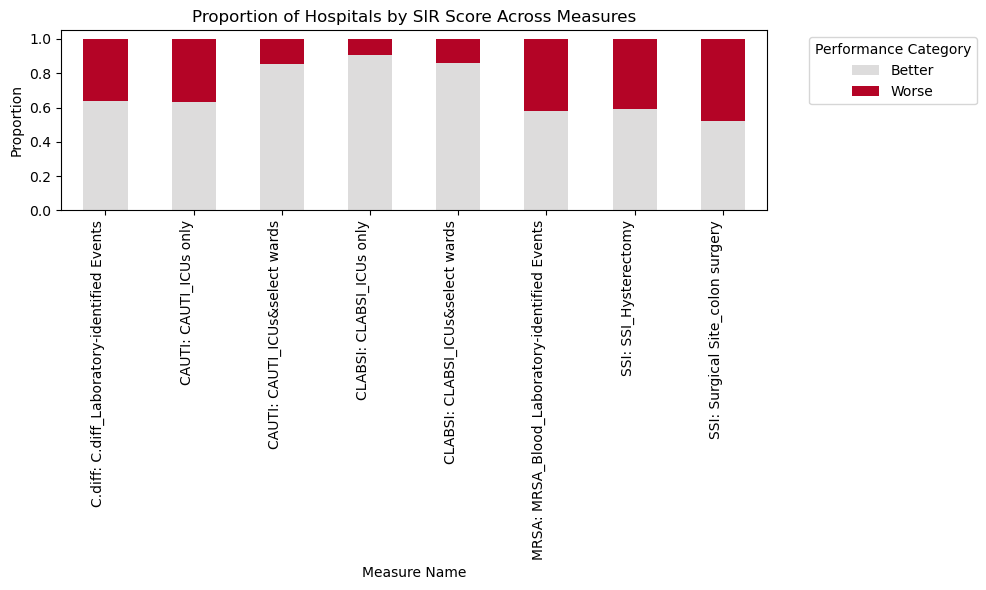

In [40]:
# Count the proportion of hospitals for each performance category and measure name
benchmark_data_sir = sir_data_slice.groupby(['Measure Name', 'Performance'])['Provider ID'].count().unstack().fillna(0)

# Normalize to get proportions
benchmark_data_sir = benchmark_data_sir.div(benchmark_data_sir.sum(axis=1), axis=0)

# Sort measures by the "Better" performance category to find the top 5
top_5_better_measures = benchmark_data_sir.sort_values(by='Better', ascending=False).head(5)

# Print the top 5 better performance measures
print("Top 5 better performance measures are:")
for measure in top_5_better_measures.index:
    print(measure)

# Plot the bar chart showing the proportion of hospitals for each performance category
benchmark_data_sir.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Proportion of Hospitals by SIR Score Across Measures')
plt.xlabel('Measure Name')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Performance Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure to a file
plt.savefig('Proportion_of_measures_SIR.png', dpi=300, bbox_inches='tight')

plt.show()

Key Finding: Across the states, the best performance of infection control can be found in CLABSI: CLABSI_ICUs only and the second of that can found in CAUTI: CAUTI_ICUs&select wards. We will look into these two measures locally and nationalwide. 

# Performance based on SIR Score across All States

Top 5 states with the highest number of 'Better' performing hospitals are:
1. CA
2. TX
3. FL
4. NY
5. PA


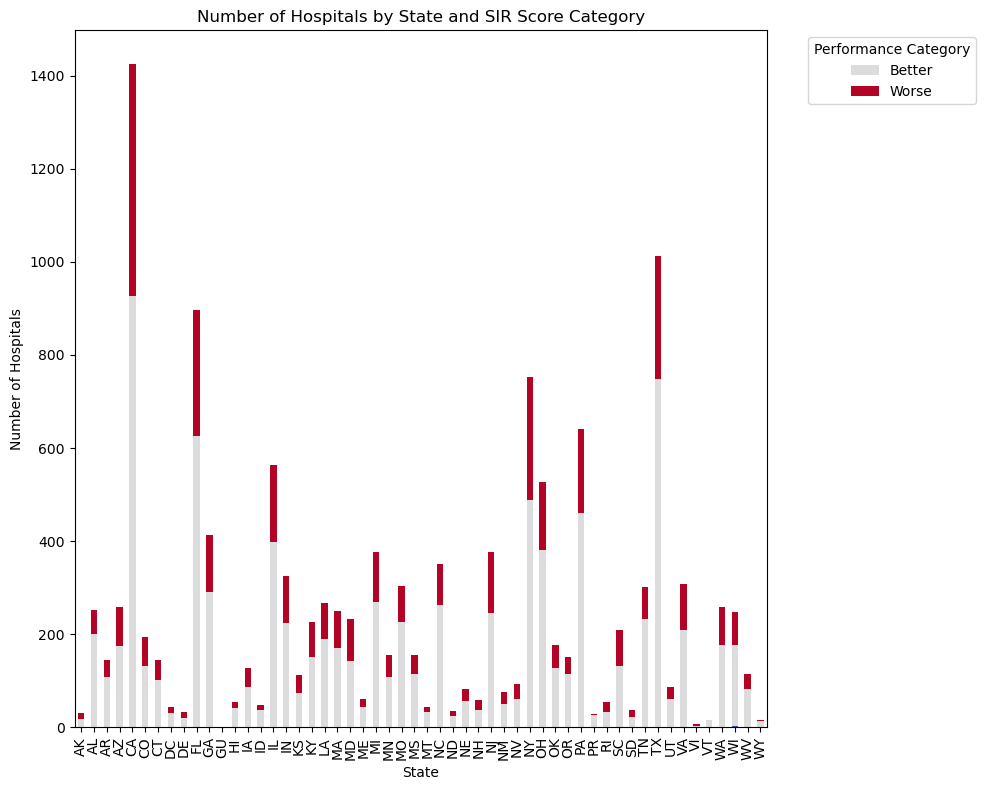

In [41]:
# Count the number of hospitals for each state and performance category
state_performance = sir_data_slice.groupby(['State', 'Performance'])['Provider ID'].count().unstack().fillna(0)

# Sort the states by the "Better" performance category to find the top 5
top_5_states = state_performance.sort_values(by='Better', ascending=False).head(5)

# Print the top 5 states
print("Top 5 states with the highest number of 'Better' performing hospitals are:")
for i, state in enumerate(top_5_states.index, start=1):
    print(f"{i}. {state}")

# Plot the bar chart showing the number of hospitals by state and SIR performance category
state_performance.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='coolwarm')
plt.title('Number of Hospitals by State and SIR Score Category')
plt.xlabel('State')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=90)
plt.legend(title='Performance Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure
plt.savefig('state_performance_chart.png', dpi=300, bbox_inches='tight')

plt.show()

In [42]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(sir_data_slice['State'], sir_data_slice['Performance'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
# print("Expected Frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("There is a significant association between hospital performance and the state (reject the null hypothesis).")
else:
    print("There is no significant association between hospital performance and the state (fail to reject the null hypothesis).")

Chi-Square Statistic: 178.4089203328419
p-value: 1.3735835373866013e-05
Degrees of Freedom: 106
There is a significant association between hospital performance and the state (reject the null hypothesis).


# Comparison of SIR Scores for Top 5 Hospitals in California across All Measures

In [44]:
# Filter the data for hospitals in California (CA)
california_hospitals = sir_data_slice[sir_data_slice['State'] == 'CA']

# Exclude hospitals with a SIR score of 0 or NaN
california_hospitals_nonzero = california_hospitals[(california_hospitals['Score'] > 0) & california_hospitals['Score'].notna()]

# Now, we can proceed with your original code to get the top 5 unique hospitals
# Sort the remaining hospitals by SIR score (lower is better) and select the top 5 unique hospitals
top_5_unique_hospitals_ca = california_hospitals_nonzero.sort_values('Score').drop_duplicates(subset=['Hospital Name']).head(5)

# Display the result
top_5_unique_hospitals_ca

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Measure ID,Measure Name,Score,Performance
25514,50464,DOCTORS MEDICAL CENTER,1441 FLORIDA AVENUE,MODESTO,CA,95350,STANISLAUS,HAI_2a_SIR,CAUTI: CAUTI_ICUs only,0.058,Better
24514,50084,ST JOSEPH'S MEDICAL CENTER OF STOCKTON,1800 N CALIFORNIA ST,STOCKTON,CA,95204,SAN JOAQUIN,HAI_2a_SIR,CAUTI: CAUTI_ICUs only,0.061,Better
29498,50292,RIVERSIDE UNIVERSITY HEALTH SYSTEM-MEDICAL CENTER,26520 CACTUS AVENUE,MORENO VALLEY,CA,92555,RIVERSIDE,HAI_1a_SIR,CLABSI: CLABSI_ICUs only,0.081,Better
28915,50772,KAISER FOUNDATION HOSPITAL - ROSEVILLE,1600 EUREKA ROAD,ROSEVILLE,CA,95661,PLACER,HAI_1a_SIR,CLABSI: CLABSI_ICUs only,0.081,Better
28727,50309,SUTTER ROSEVILLE MEDICAL CENTER,ONE MEDICAL PLAZA,ROSEVILLE,CA,95661,PLACER,HAI_1a_SIR,CLABSI: CLABSI_ICUs only,0.090,Better


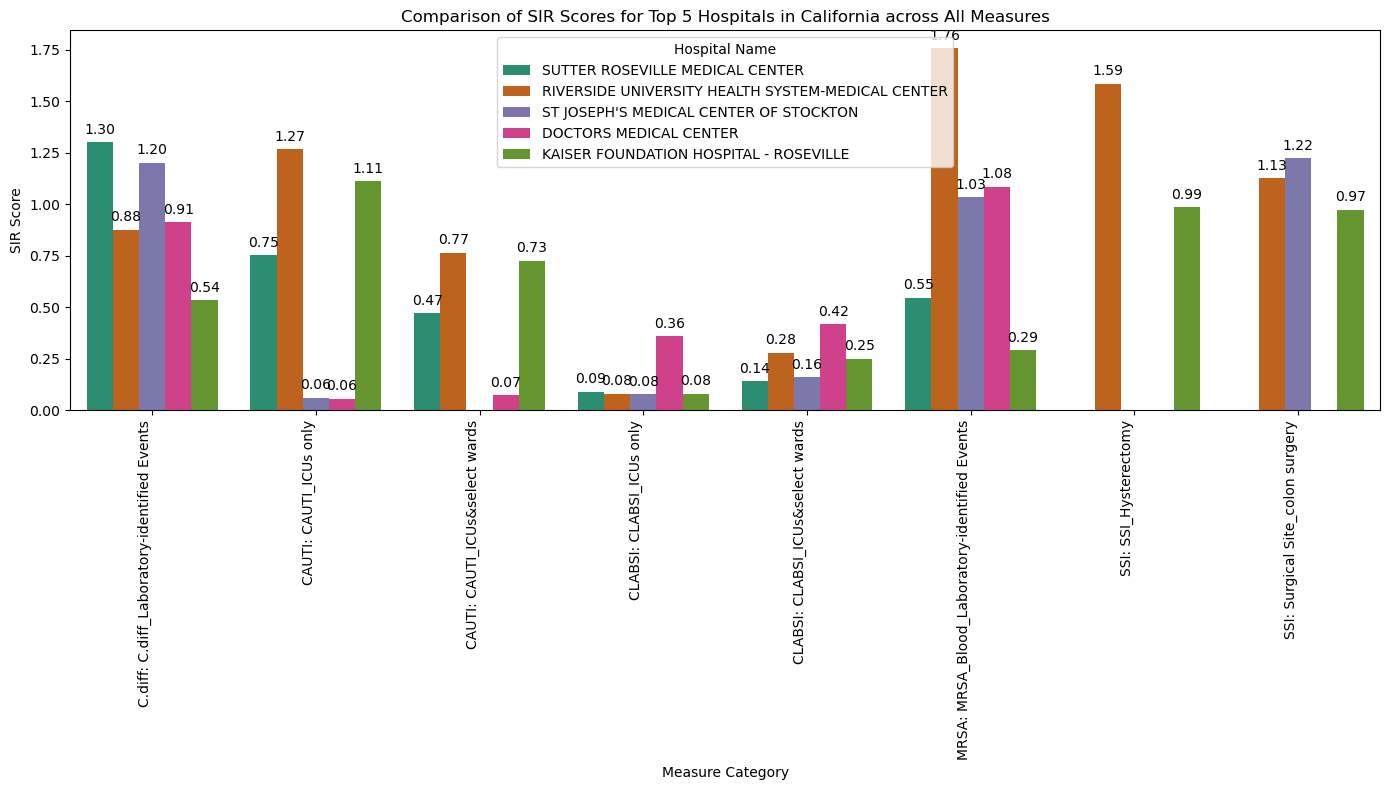

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate a distinct color palette
def create_distinct_palette(n_colors):
    return sns.color_palette("Dark2", n_colors)

# Sort the remaining hospitals by SIR score (lower is better) and select the top 5 unique hospitals
top_5_unique_hospitals_ca = california_hospitals_nonzero.sort_values('Score').drop_duplicates(subset=['Hospital Name']).head(5)

# Filter the data for the top 5 hospitals across all measures
filtered_data_all_measures = california_hospitals_nonzero[california_hospitals_nonzero['Provider ID'].isin(top_5_unique_hospitals_ca['Provider ID'])]

# Create a distinct color palette for the top 5 hospitals
colors = create_distinct_palette(len(top_5_unique_hospitals_ca))

plt.figure(figsize=(14, 8))

# Create a bar plot where x-axis is 'Measure Name', y-axis is 'Score', and hue is 'Hospital Name'
barplot_all_measures = sns.barplot(x='Measure Name', y='Score', hue='Hospital Name', data=filtered_data_all_measures, palette=colors)

# Add the exact SIR scores on top of each bar
for p in barplot_all_measures.patches:
    height = p.get_height()
    barplot_all_measures.annotate(format(height, '.2f'),
                                  (p.get_x() + p.get_width() / 2., height),
                                  ha='center', va='center', 
                                  xytext=(0, 9), textcoords='offset points', fontsize=10, color='black')

# Customize the plot
plt.title('Comparison of SIR Scores for Top 5 Hospitals in California across All Measures')
plt.xlabel('Measure Category')
plt.ylabel('SIR Score')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Hospital Name')
plt.tight_layout()

# Save the figure
plt.savefig('top5_CA_all_measures_distinct.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Comparison of SIR Scores for CLABSI (ICUs only) and CAUTI (both ICUs & Selected wards) for Top 5 Hospitals

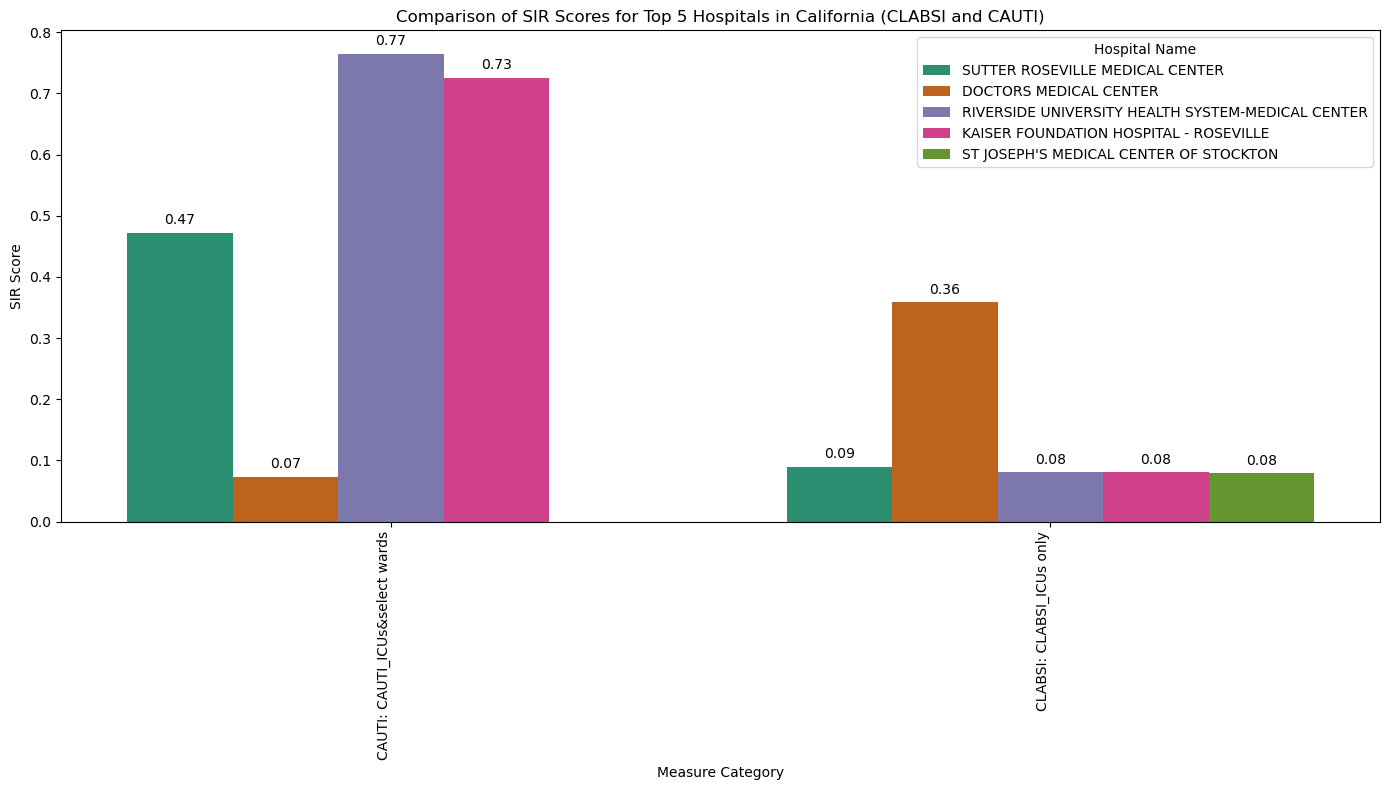

In [46]:
# Define the measures of interest (CLABSI and CAUTI)
measures_of_interest = ['CLABSI: CLABSI_ICUs only', 'CAUTI: CAUTI_ICUs&select wards']

# Filter the data for the top 5 hospitals and the two specific measures
filtered_data_specific_measures = filtered_data_all_measures[filtered_data_all_measures['Measure Name'].isin(measures_of_interest)]

plt.figure(figsize=(14, 8))

# Create a bar plot for the two specific measures using the same color gradient
barplot_specific_measures = sns.barplot(x='Measure Name', y='Score', hue='Hospital Name', data=filtered_data_specific_measures, palette=colors)

# Add the exact SIR scores on top of each bar
for p in barplot_specific_measures.patches:
    height = p.get_height()
    barplot_specific_measures.annotate(format(height, '.2f'),
                                       (p.get_x() + p.get_width() / 2., height),
                                       ha='center', va='center', 
                                       xytext=(0, 9), textcoords='offset points', fontsize=10, color='black')

# Customize the plot
plt.title('Comparison of SIR Scores for Top 5 Hospitals in California (CLABSI and CAUTI)')
plt.xlabel('Measure Category')
plt.ylabel('SIR Score')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Hospital Name')
plt.tight_layout()

# Save the figure
plt.savefig('top5_CA_CLABSI_CAUTI_gradient.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Key Findings
- **Central line-associated bloodstream infections (CLABSI) (ICUs Only)**:

**Sutter Roseville Medical Center**, **Kaiser Foundation Hospital - Roseville**, and **ST Joseph's Medical Center of Stockton** all perform exceptionally well, with very low SIR scores of 0.08 to 0.09, indicating a strong performance in preventing CLABSI in ICUs. At the same time, **Riverside University Health System - Medical Center** also shows excellent performance, with an SIR score of 0.08, reflecting strong infection prevention strategies.

Doctors Medical Center has a moderate SIR score of 0.36, indicating room for improvement but still performing better than the national benchmark.

- **Catheter-associated urinary tract infections (CAUTI) (ICUs & Select Wards)**:

**Doctors Medical Center** demonstrates exceptional performance with a very low SIR score of 0.07, highlighting effective control of catheter-associated urinary tract infections.
Kaiser Foundation Hospital - Roseville and Riverside University Health System - Medical Center have higher SIR scores of 0.73 and 0.77, respectively, reflecting significantly worse performance compared to the national benchmark.
Sutter Roseville Medical Center performs moderately with a SIR score of 0.47, still better than the national benchmark but with room for improvement.

## Conclusion:
**Riverside University Health System - Medical Center**, **Kaiser Foundation Hospital - Roseville**, and **ST Joseph's Medical Center of Stockton** demonstrate excellent performance **Central-line associated Bloodstream Infection** in ICUs only, with very low SIR scores. **Doctors Medical Center** excels particularly in strong performance in **catheter-associated urinary tract infections** prevention in both ICU and selected wards. However, Kaiser Foundation Hospital - Roseville and Riverside University Health System - Medical Center show poor performance in CAUTI control, requiring significant improvements. Sutter Roseville Medical Center also has moderate performance in CAUTI prevention, leaving room for further enhancement.

# Top 3 hospitals with the best SIR performance (combined from California and general top 5)

In [50]:
# Get the top 5 hospitals across all states (general top 5)
all_hospitals_nonzero = sir_data_slice[(sir_data_slice['Score'] > 0) & sir_data_slice['Score'].notna()]

# Sort by SIR score (lower is better) and select the top 5 hospitals across all states
top_5_hospitals_all_states = all_hospitals_nonzero.sort_values('Score').head(5)
top_5_hospitals_ca = california_hospitals_nonzero.sort_values('Score').drop_duplicates(subset=['Hospital Name']).head(5)

# Check for overlap by hospital name or provider ID between California and general top 5 hospitals
overlapping_hospitals = top_5_hospitals_all_states[top_5_hospitals_all_states['Hospital Name'].isin(top_5_hospitals_ca['Hospital Name'])]

# Print results for overlapping hospitals (if any)
if not overlapping_hospitals.empty:
    print("Overlapping hospitals found between top 5 hospitals in California and the general top 5 hospitals:")
    print(overlapping_hospitals[['Hospital Name', 'State']])
else:
    print("No overlapping hospitals found between top 5 hospitals in California and the general top 5 hospitals.")

# Combine the two lists of hospitals (top 5 in California and top 5 in general)
combined_top_10 = pd.concat([top_5_hospitals_ca, top_5_hospitals_all_states])

# Remove duplicates (if any) to avoid counting the same hospital twice
combined_top_10 = combined_top_10.drop_duplicates(subset='Hospital Name')

# Sort the combined list by SIR score and select the top 3 hospitals with the best performance
top_3_hospitals = combined_top_10.sort_values('Score').head(3)

# Print the top 3 hospitals with the best performance
print("Top 3 hospitals with the best SIR performance (combined from California and general top 5):")
print(top_3_hospitals[['Hospital Name', 'State', 'Score']])

No overlapping hospitals found between top 5 hospitals in California and the general top 5 hospitals.
Top 3 hospitals with the best SIR performance (combined from California and general top 5):
                                    Hospital Name State  Score
19876                ST FRANCIS HEALTH CENTER INC    KS  0.038
31411       NORTHEAST GEORGIA MEDICAL CENTER, INC    GA  0.046
28771  ST ROSE DOMINICAN HOSPITALS - SIENA CAMPUS    NV  0.051


In [51]:
top_3_unique_hospitals_all_states = sir_data_slice.sort_values('Score').drop_duplicates(subset=['Hospital Name']).head(3)
top_3_unique_hospitals_all_states 

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Measure ID,Measure Name,Score,Performance
19876,170016,ST FRANCIS HEALTH CENTER INC,1700 SW 7TH STREET,TOPEKA,KS,66606,SHAWNEE,HAI_6_SIR,C.diff: C.diff_Laboratory-identified Events,0.038,Better
31411,110029,"NORTHEAST GEORGIA MEDICAL CENTER, INC",743 SPRING STREET,GAINESVILLE,GA,30501,HALL,HAI_1_SIR,CLABSI: CLABSI_ICUs&select wards,0.046,Better
28771,290045,ST ROSE DOMINICAN HOSPITALS - SIENA CAMPUS,3001 ST ROSE PARKWAY,HENDERSON,NV,89052,CLARK,HAI_1a_SIR,CLABSI: CLABSI_ICUs only,0.051,Better


# Comparison of SIR Scores Across All Measures for Top 3 Hospitals Nationalwide

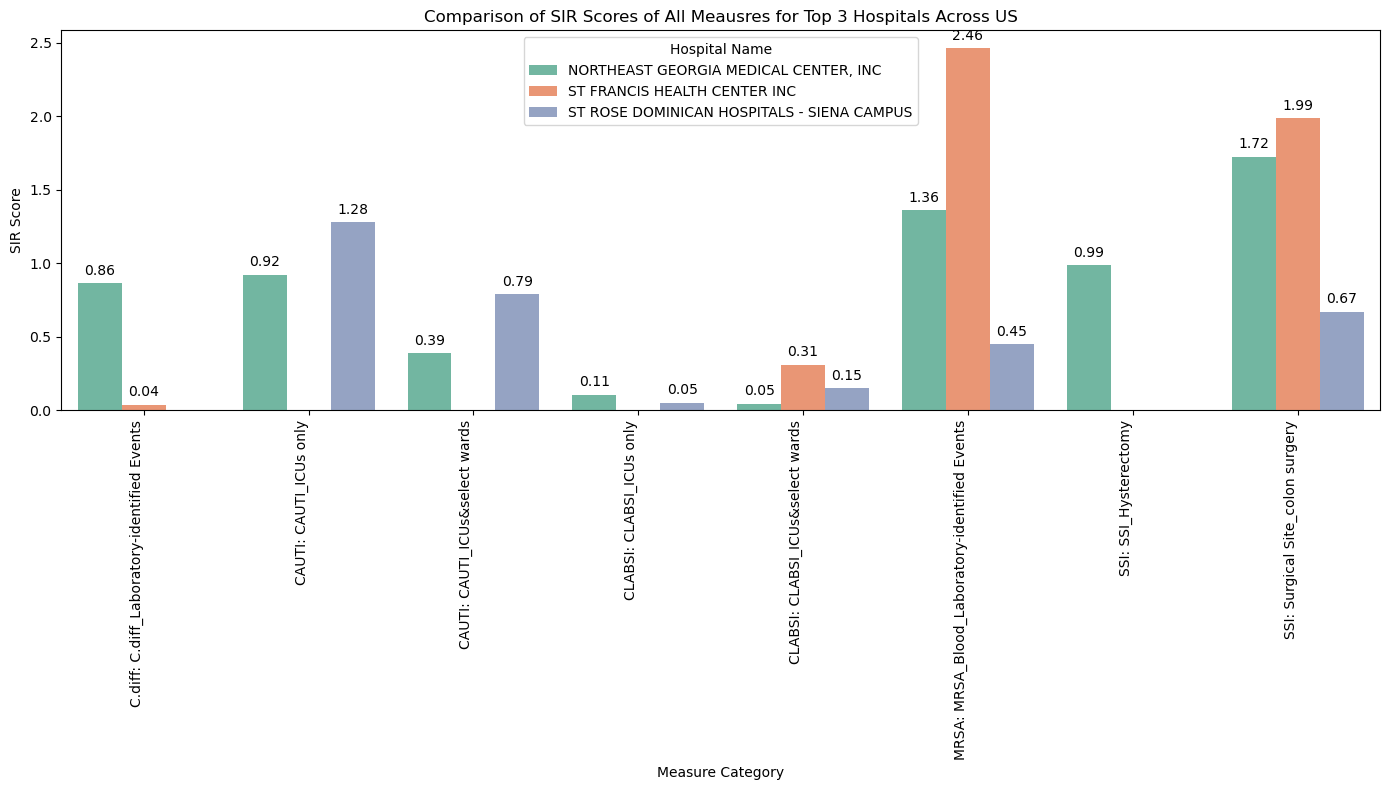

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate a distinct color palette
def create_distinct_palette(n_colors):
    return sns.color_palette("Set2", n_colors)

# Sort the remaining hospitals by SIR score (lower is better) and select the top 3 unique hospitals across all states
top_3_unique_hospitals_all_states = sir_data_slice.sort_values('Score').drop_duplicates(subset=['Hospital Name']).head(3)

# Filter the data for the top 3 hospitals across all measures
filtered_data_all_measures = sir_data_slice[sir_data_slice['Provider ID'].isin(top_3_unique_hospitals_all_states['Provider ID'])]

# Create a distinct color palette for the top 3 hospitals
colors = create_distinct_palette(len(top_3_unique_hospitals_all_states))

plt.figure(figsize=(14, 8))

# Create a bar plot where x-axis is 'Measure Name', y-axis is 'Score', and hue is 'Hospital Name'
barplot_all_measures = sns.barplot(x='Measure Name', y='Score', hue='Hospital Name', data=filtered_data_all_measures, palette=colors)

# Add the exact SIR scores on top of each bar
for p in barplot_all_measures.patches:
    height = p.get_height()
    barplot_all_measures.annotate(format(height, '.2f'),
                                  (p.get_x() + p.get_width() / 2., height),
                                  ha='center', va='center', 
                                  xytext=(0, 9), textcoords='offset points', fontsize=10, color='black')

# Customize the plot
plt.title('Comparison of SIR Scores of All Meausres for Top 3 Hospitals Across US')
plt.xlabel('Measure Category')
plt.ylabel('SIR Score')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Hospital Name')
plt.tight_layout()

# Save the figure
plt.savefig('top3_US_measures_distinct.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Comparison of SIR Scores of CLABSI_ICUs only and CAUTI_ICUs&select wards for Top 3 Hospitals Nationalwide

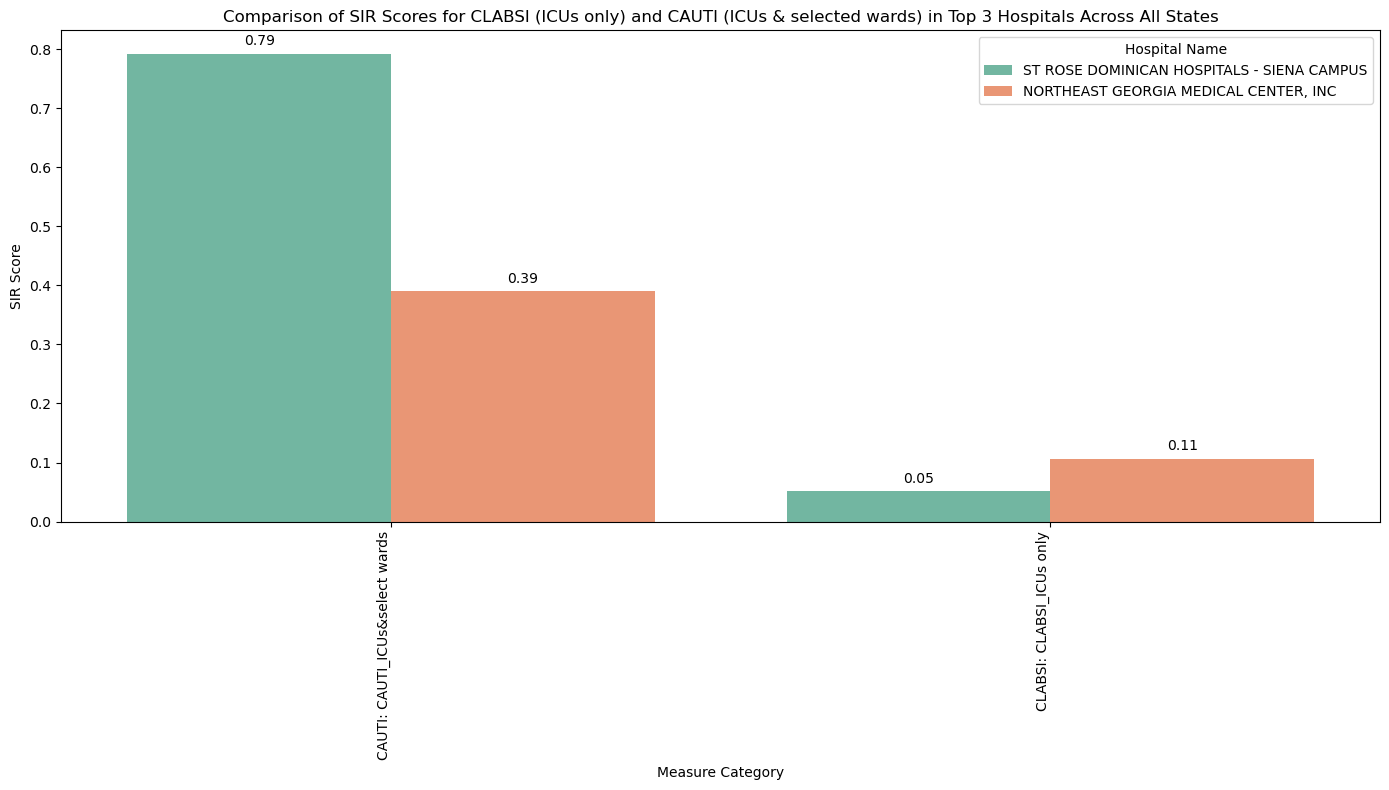

In [53]:
# Function to generate a distinct color palette
def create_distinct_palette(n_colors):
    return sns.color_palette("Set2", n_colors)

# Sort the remaining hospitals by SIR score (lower is better) and select the top 3 unique hospitals across all states
top_3_unique_hospitals_all_states = sir_data_slice.sort_values('Score').drop_duplicates(subset=['Hospital Name']).head(3)

# Define the measures of interest (CLABSI and CAUTI)
measures_of_interest = ['CLABSI: CLABSI_ICUs only', 'CAUTI: CAUTI_ICUs&select wards']

# Filter the data for the top 3 hospitals and the two specific measures (CLABSI and CAUTI)
filtered_data_specific_measures = sir_data_slice[sir_data_slice['Provider ID'].isin(top_3_unique_hospitals_all_states['Provider ID']) & 
                                                  sir_data_slice['Measure Name'].isin(measures_of_interest)]

# Create a distinct color palette for the top 3 hospitals
colors = create_distinct_palette(len(top_3_unique_hospitals_all_states))

plt.figure(figsize=(14, 8))

# Create a bar plot where x-axis is 'Measure Name', y-axis is 'Score', and hue is 'Hospital Name'
barplot_specific_measures = sns.barplot(x='Measure Name', y='Score', hue='Hospital Name', data=filtered_data_specific_measures, palette=colors)

# Add the exact SIR scores on top of each bar
for p in barplot_specific_measures.patches:
    height = p.get_height()
    barplot_specific_measures.annotate(format(height, '.2f'),
                                       (p.get_x() + p.get_width() / 2., height),
                                       ha='center', va='center', 
                                       xytext=(0, 9), textcoords='offset points', fontsize=10, color='black')

# Customize the plot
plt.title('Comparison of SIR Scores for CLABSI (ICUs only) and CAUTI (ICUs & selected wards) in Top 3 Hospitals Across All States')
plt.xlabel('Measure Category')
plt.ylabel('SIR Score')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Hospital Name')
plt.tight_layout()

# Save the figure
plt.savefig('top3_CLABSI_CAUTI_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Key Findings
**Top Performers in Infection Control**:
1. **ST Rose Dominican Hospitals - Siena Campus** in **Nevada**
- CAUTI (ICUs & selected wards): With a SIR score of 0.79, they are close to the national benchmark of 1, indicating some room for improvement in catheter-associated urinary tract infection prevention, but they are not performing poorly.
- CLABSI (ICUs only): They show strong performance with a SIR score of 0.05, which is significantly below the national benchmark of 1. This suggests a high level of control over **central line-associated bloodstream infections in ICUs**. (**First-picked Hospital for managing Cental-line associated Bloodstream Infections**)

2. **Northeast Georgia Medical Center, Inc.** in **Georgia** shows good performance in both areas, though with room for improvement in CAUTI:
- CAUTI (ICUs & selected wards): The SIR score is 0.39, which indicates outstanding performance in CAUTI prevention. (**First-picked Hospital for managing catheter-associated Urinary Tract Infections**)
- CLABSI (ICUs only): Their SIR score of 0.11 for CLABSI also shows strong performance, though slightly higher than ST Rose Dominican Hospitals. This suggests they are well-controlled in preventing infections from central lines.

3. There was no available measurement conducted for **ST FRANCIS HEALTH CENTER INC** in **Kansas**. However, it shows a good performance in Clostridium difficile (C.diff.) Laboratory-identified Events (Intestinal infections) with SIR score 0.038 (0.04 in the Figure of Comparison of SIR Scores of All measures for Top 3 Hospitals Across US).

**No Overlap in Top Performers**:
Our analysis found no overlap between the top 5 hospitals in California and the top 5 hospitals across all states. This shows that top-performing hospitals are spread across different geographic regions, implying that excellence in infection control is not geographically concentrated and can be achieved in any setting with effective protocols and practices.

# Conclusion
Our group project successfully analyzed hospital infection control performance using Standardized Infection Ratio (SIR) scores across various healthcare-associated infections (HAIs). We highlighted that hospitals such as **ST ROSE DOMINICAN HOSPITALS - SIENA CAMPUS** in **Nevada** excelled in managing **central-line associated Infections**, while others, like **ST FRANCIS HEALTH CENTER INC, showed areas for improvement**, particularly in MRSA and Surgical Site Infections (SSI). In addition, **Northeast Georgia Medical Center, Inc. in Georgia** has an exellent management in **catheter-associated Urinary Tract Infections**. 

This analysis demonstrates the importance of data-driven insights in improving hospital infection control measures. By adopting the best practices and protocols from ST ROSE DOMINICAN HOSPITALS - SIENA CAMPUS (CLABSI (ICUs only)), healthcare providers can significantly reduce fetal central line-associated bloodstream infection rates and improve patient outcomes in Intensive Care Units. As for catheter-associated Urinary Tract Infections control, we can adopt the practices and protocols from Northeast Georgia Medical Center, Inc.

Moving forward, future analyses can be enhanced by incorporating more granular data, predictive analytics, and interactive visualizations to provide hospitals with actionable insights for ongoing improvement in infection control.